In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as ss

**A. Calculate eigenvectors and eigenvalues by hand**

Using a very simple example with a best dataset




(0.9999999999999998, 0.0)


Text(0, 0.5, 'y')

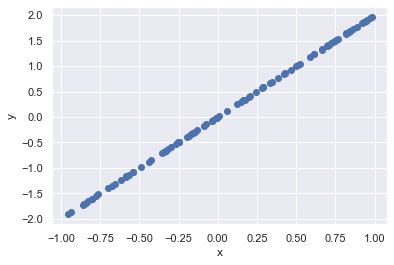

In [3]:
x = np.random.uniform(-1,1,100)
y = 2*x
plt.scatter(x,y)
print(ss.pearsonr(x,y))
plt.xlabel('x')
plt.ylabel('y')

1. Get the data matrix
2. Subtract the mean (optional)
3. Calculate covariance matrix

In [4]:
X_matrix = np.stack((x,y),axis=1)
print(len(X_matrix),len(X_matrix[0]))
#X_matrix[i,j] 

100 2


In [5]:
X_matrix[:,0]=X_matrix[:,0]-np.mean(X_matrix[:,0])
X_matrix[:,1]=X_matrix[:,1]-np.mean(X_matrix[:,1])
#print(X_matrix)

In [6]:
#Covariance = np.cov(X_matrix.T)
#print(Covariance)

In [7]:
Covariance = np.cov(X_matrix.T)
print(Covariance)

[[0.34410231 0.68820461]
 [0.68820461 1.37640923]]


***Now, calculate the eigenvalues and eigenvectors by hand.***

What is the answer?





**B. Run PCA for this case**

1. Import PCA and run!

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_matrix)

# input matrx[i,j] i Number of object j Number of features

PCA()

2. Eigenvectors as pca.components_

In [9]:
print('1st Eigenvector:',pca.components_[0])
print('2nd Eigenvector:',pca.components_[1])

1st Eigenvector: [-0.4472136  -0.89442719]
2nd Eigenvector: [-0.89442719  0.4472136 ]


3. Eigenvalues as pca.explained_variance_

In [10]:
print('Eigenvalues',pca.explained_variance_)
print('Explain variance',pca.explained_variance_ratio_)

Eigenvalues [1.72051153e+00 3.02429363e-33]
Explain variance [1.00000000e+00 1.75778748e-33]


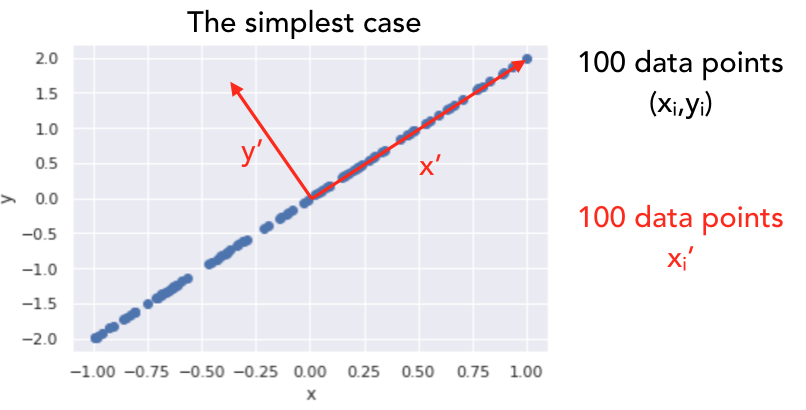

**The new xy values - coefficients**

The dot between original data and eigenvectors




In [11]:
new_x = np.dot(X_matrix,pca.components_[0])
new_y = np.dot(X_matrix,pca.components_[1])
print(X_matrix[1,:])
print(new_x[1],new_y[1])
#print(new_y)

[0.74420297 1.48840593]
-1.6640884204764805 0.0


In [12]:
coefficients = pca.transform(X_matrix)

In [13]:
coefficients[1,0]

-1.6640884204764805

In [14]:
pca.components_[0]

array([-0.4472136 , -0.89442719])

**PCA can reconstruct the original dataset**

Very important to make sure we are doing right!

(x,y) = coefficient1 x eigenvector 1+ coefficient2 x eigenvector2

In [15]:
#x_reconstruct = np.arange(0,100)*0.0
#y_reconstruct = np.arange(0,100)*0.0
x_reconstruct = np.zeros((100,2))
for i_object in range(0,100):
    #x_reconstruct[i_object]=new_x[i_object]*pca.components_[0][0]+new_y[i_object]*pca.components_[1][0]
    #y_reconstruct[i_object]=new_x[i_object]*pca.components_[0][1]+new_y[i_object]*pca.components_[1][1]
    x_reconstruct[i_object]=coefficients[i_object,0]*pca.components_[0]+coefficients[i_object,1]*pca.components_[1]+pca.mean_


In [16]:
print(x_reconstruct[1])
print(X_matrix[1])

[0.74420297 1.48840593]
[0.74420297 1.48840593]


**Eigenvectors are orthogonal.**

In [17]:
np.dot(pca.components_[0],pca.components_[1])

0.0

**C. Exercise SDSS quasar spectra**

1. Download data https://drive.google.com/file/d/1bfZ5uCvZAFTJ67mdAges3Bd6VEne3qdM/view?usp=sharing

In [18]:
#from google.colab import drive
#drive.mount(dd'/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/Colab Notebooks/"

In [19]:
import astropy.io.fits as pf
from sklearn.decomposition import  PCA
data = pf.open('clean_spectra.fits')
# data[0].data[N_object,N_pixel]
# data[2].data log_wavelength
wavelength = 10**data[2].data

import scipy.ndimage as sn
smooth_spectra = np.zeros((len(data[0].data),len(data[0].data[0])))

for i_object in range(0,len(data[0].data)):
    smooth_spectra[i_object] = sn.median_filter(data[0].data[i_object],20)

In [15]:
len(wavelength)

2483

Text(0.5, 0, 'Wavelength [$\\rm \\AA$]')

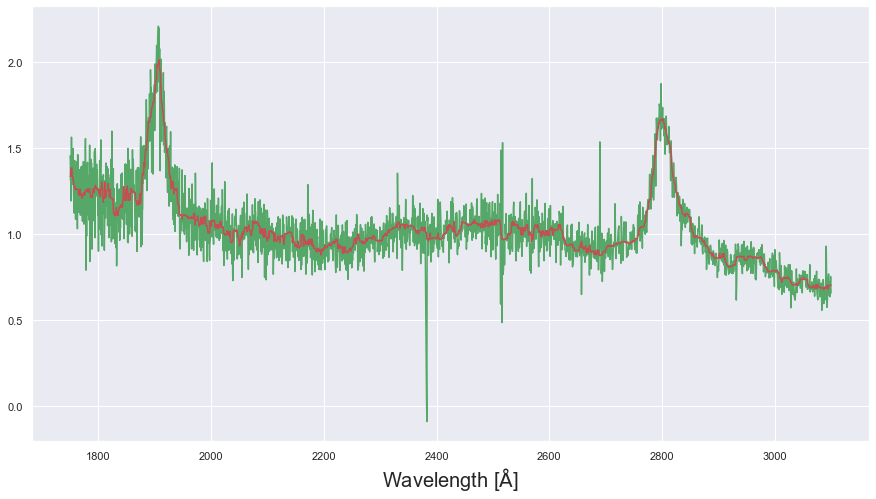

In [20]:
plt.figure(figsize=(15,8))
#plt.plot(wavelength,data[0].data[10,:],color='C0')
#plt.plot(wavelength,data[0].data[701,:],color='C1')
plt.plot(wavelength,data[0].data[105,:],color='C2')
plt.plot(wavelength,smooth_spectra[105,:],color='C3')

plt.xlabel('Wavelength [$\\rm \\AA$]',fontsize=20)
#plt.ylabel('Flux []')

**Do the PCA and explore the outputs!**

Follow the code above!

1. Data structure matrix [i_object, i_feature]


2. pca = PCA(n_components=10)
   
   pca.fit(matrix) # matrix = smooth_spectra
   
   
3. plot wavelength, pca.mean_


4. plot wavelength, pca.components_[i] i=0,1,2,3,4,5,6

In [25]:
pca = PCA()
#pca.fit(smooth_spectra)
pca.fit(data[0].data)

PCA()

In [22]:
len(pca.explained_variance_ratio_)

1592

In [23]:
coeff = pca.transform(data[0].data)

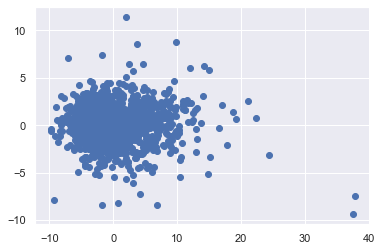

In [24]:
plt.scatter(coeff[:,0],coeff[:,1])

In [60]:
search = np.where((coeff[:,1]>10))[0]
print(search)

[956]


In [87]:
i_object = 0
reconstruct_spectrum = np.arange(0,len(wavelength))*0.0
for i in range(0,10):
    reconstruct_spectrum+=pca.components_[i]*coeff[i_object,i]
reconstruct_spectrum += pca.mean_

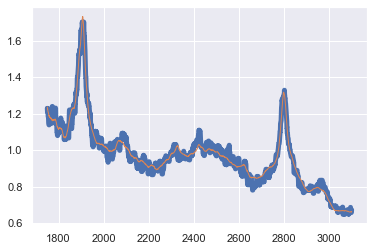

In [88]:
plt.plot(wavelength,smooth_spectra[i_object,:],lw=5)
plt.plot(wavelength,reconstruct_spectrum,lw=1)

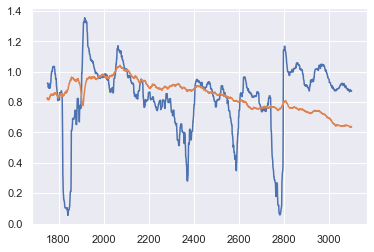

In [61]:
plt.plot(wavelength,smooth_spectra[956,:])
plt.plot(wavelength,pca.mean_+pca.components_[0]*0+pca.components_[1]*10.)

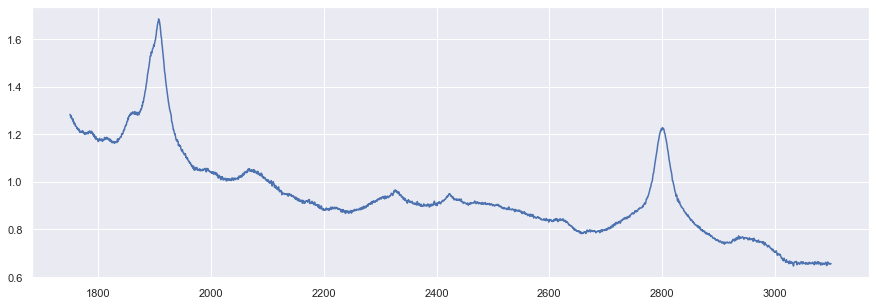

In [28]:
plt.figure(figsize=(15,5))
plt.plot(wavelength,pca.mean_)
#plt.plot(wavelength,pca.mean_+pca.components_[0]*40)
#plt.plot(wavelength,pca.mean_+pca.components_[0]*-10)

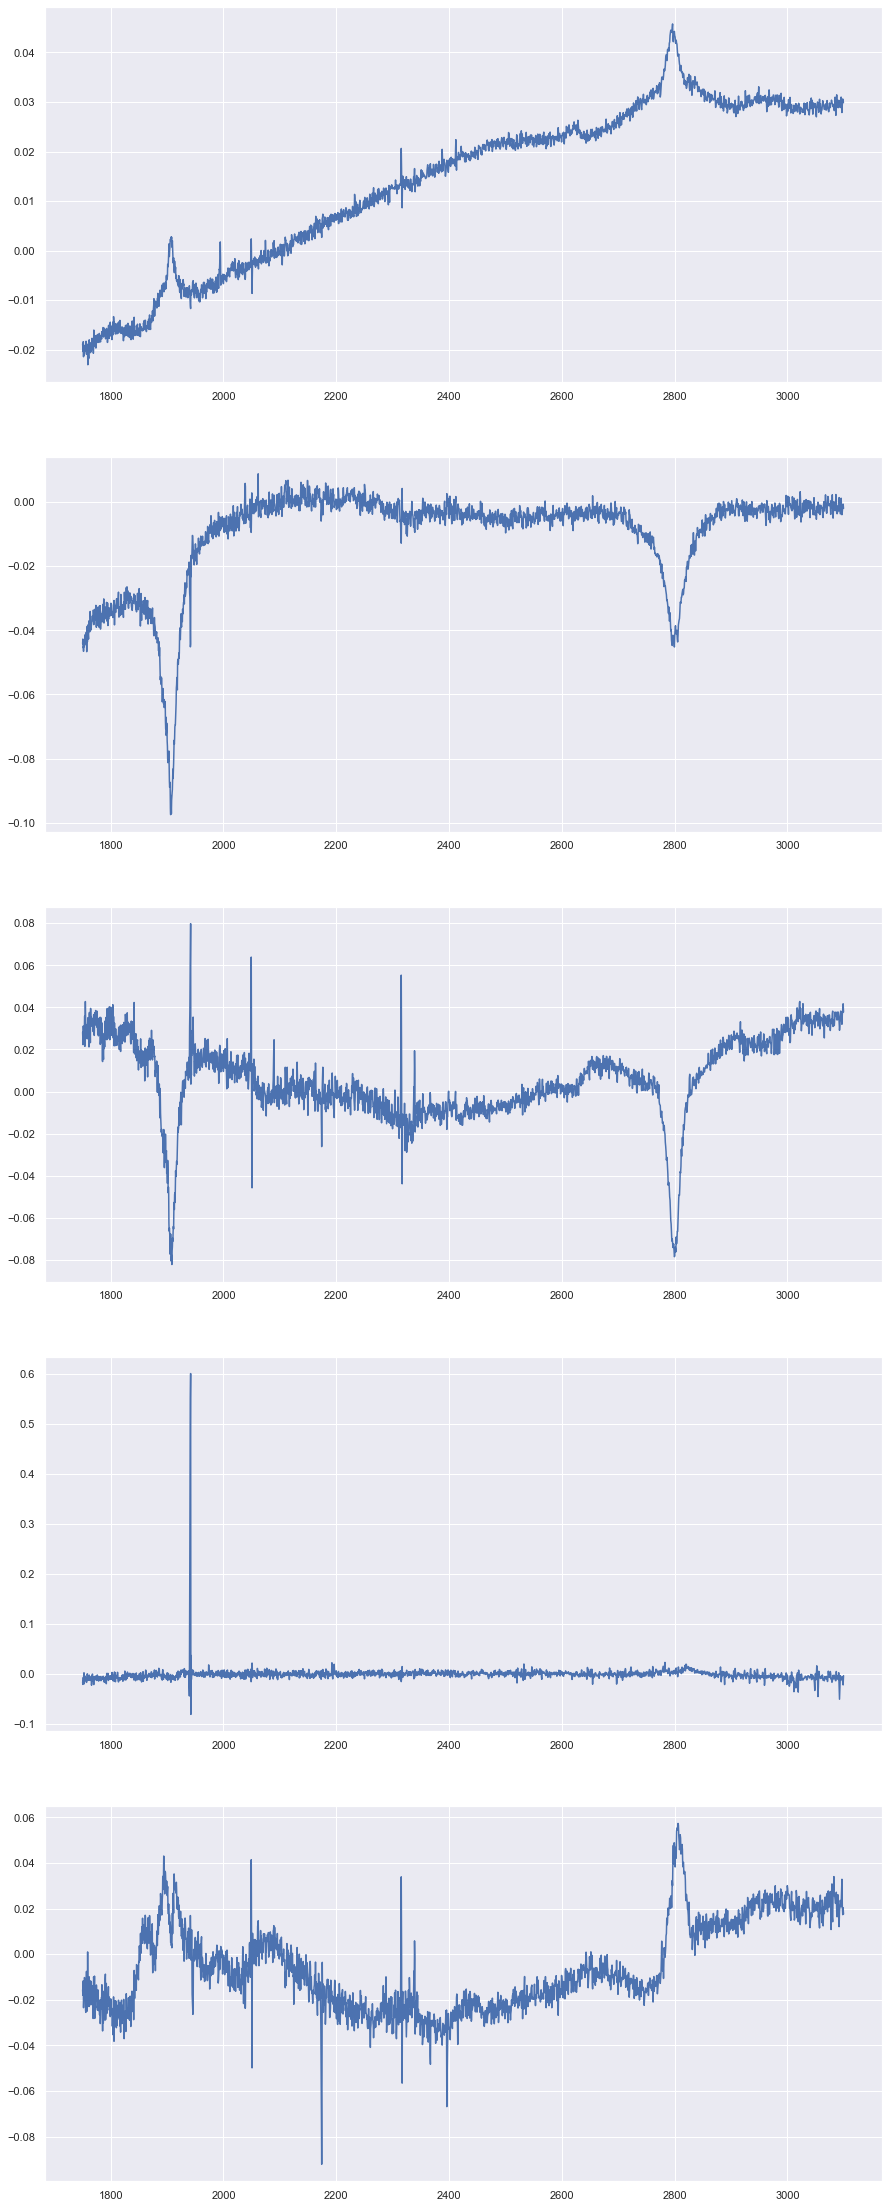

In [27]:
plt.figure(figsize=(15,40))
for i in range(0,5):
    plt.subplot(5,1,i+1)
    plt.plot(wavelength,pca.components_[i])
    #plt.ylim(-0.05,0.05)

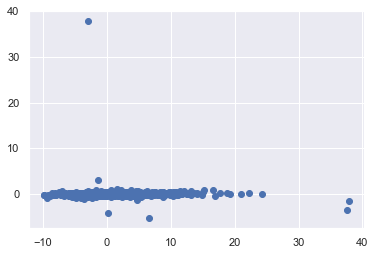

In [30]:
plt.scatter(coeff[:,0],coeff[:,3])


In [31]:
print(np.where(coeff[:,3]>30)[0])

[1338]


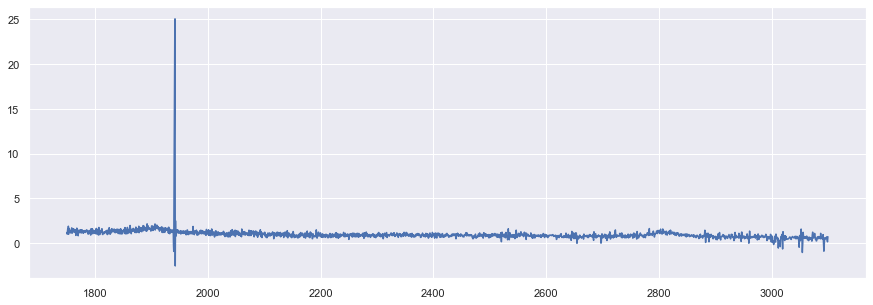

In [33]:
plt.figure(figsize=(15,5))
plt.plot(wavelength,data[0].data[1338,:])

# -------------------------------------------

In [35]:
# Exercise 2
from sklearn.datasets import load_digits
digits = load_digits()
digits.data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

[[ 0.  0.  1. 14.  2.  0.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  0. 14. 10.  0.  0.  0.]
 [ 0.  0.  0. 11. 16.  1.  0.  0.]
 [ 0.  0.  0.  3. 14.  6.  0.  0.]
 [ 0.  0.  0.  0.  8. 12.  0.  0.]
 [ 0.  0. 10. 14. 13. 16.  8.  3.]
 [ 0.  0.  2. 11. 12. 15. 16. 15.]]


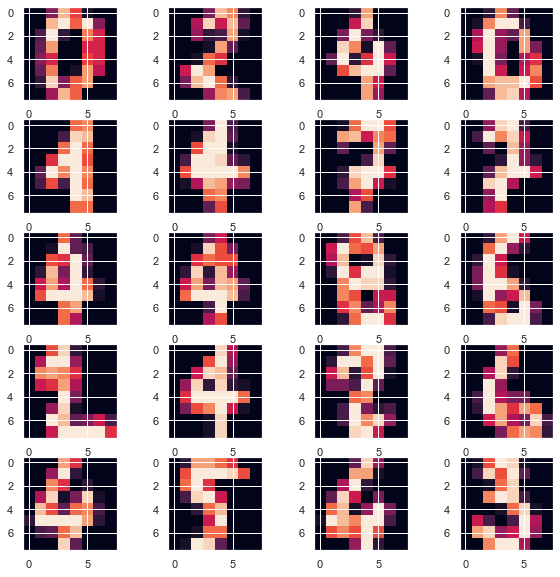

In [36]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(digits.data[i*50].reshape(8,8))
print(digits.data[1000].reshape(8,8))

In [ ]:
pca = PCA()
pca.fit(digits.data)
coeff = pca.transform(digits.data)

In [78]:
i_object = 100
reconstruct_data = np.arange(0,64)*0.0
for i in range(0,64):
    reconstruct_data+=pca.components_[i]*coeff[i_object,i]
reconstruct_data += pca.mean_

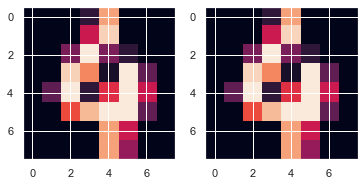

In [79]:
plt.subplot(1,2,1)
plt.imshow(reconstruct_data.reshape(8,8))
plt.subplot(1,2,2)
plt.imshow(digits.data[i_object].reshape(8,8))

In [46]:
pca.explained_variance_ratio_[0:5]

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415])

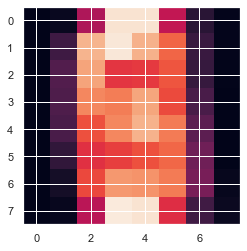

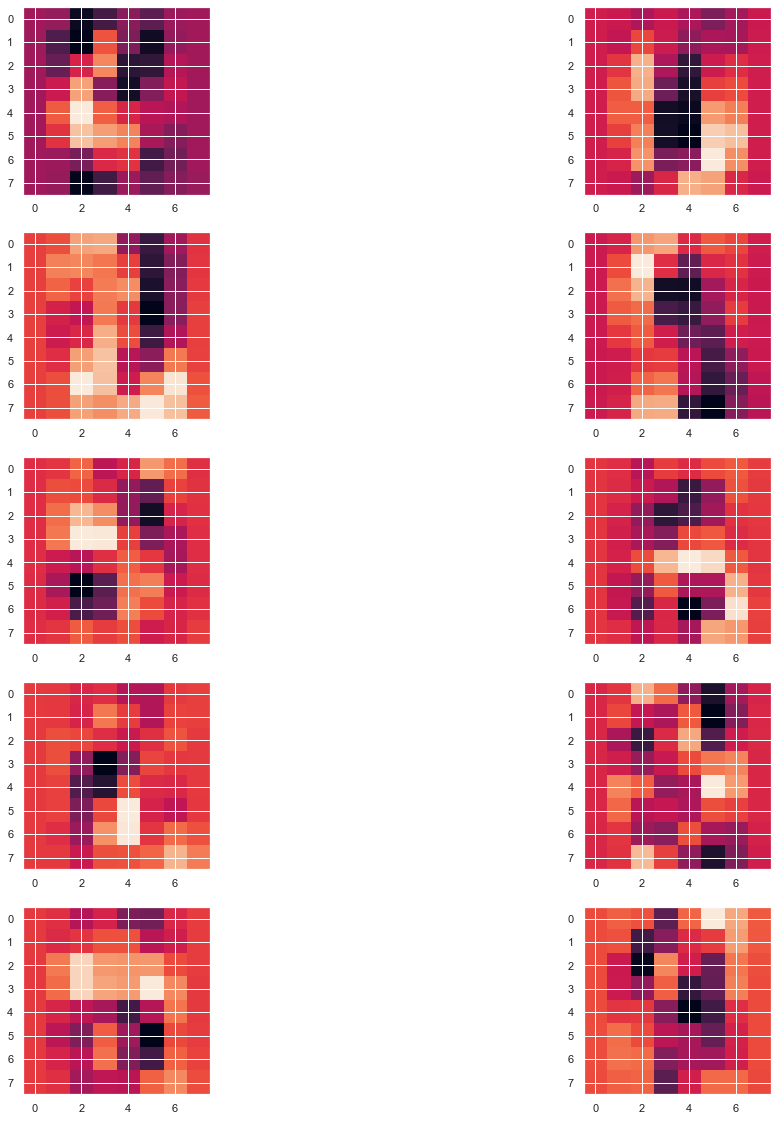

In [44]:
plt.imshow(pca.mean_.reshape(8,8))
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.01)
for i in range(0,10):
    plt.subplot(5,2,i+1)
    plt.imshow(pca.components_[i].reshape(8,8))
    


PCA()

### Do PCA with this dataset
### Get the coeff

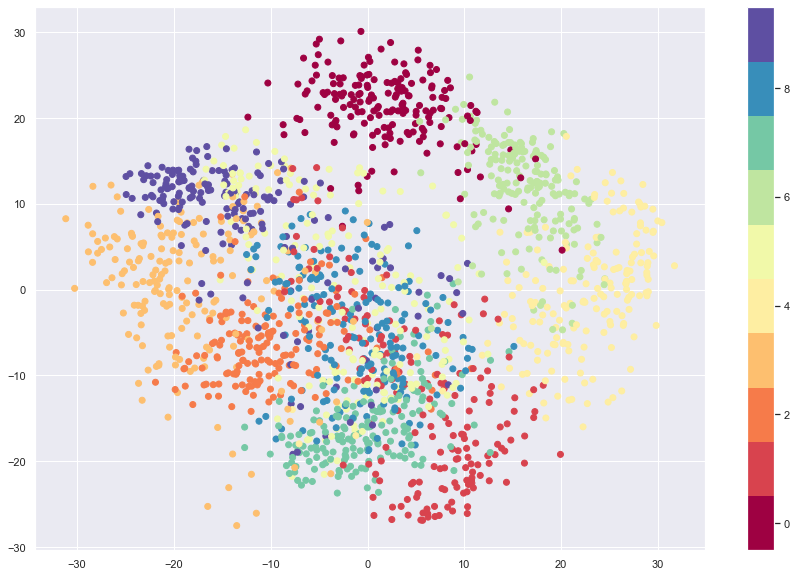

In [69]:
plt.figure(figsize=(15,10))
plt.scatter(coeff[:,0],coeff[:,1],c=digits.target,cmap=plt.cm.get_cmap('Spectral', 10),vmin=-0.5,vmax=9.5)
plt.colorbar()